In [2]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
from sklearn.neighbors import KNeighborsRegressor
mpl.rcParams['axes.unicode_minus'] = False

X, y = mglearn.datasets.make_wave(n_samples=40)

#wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg  = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

print("테스트 세트 예측 : \n", reg.predict(X_test))

print("테스트세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트세트 R^2: 0.83


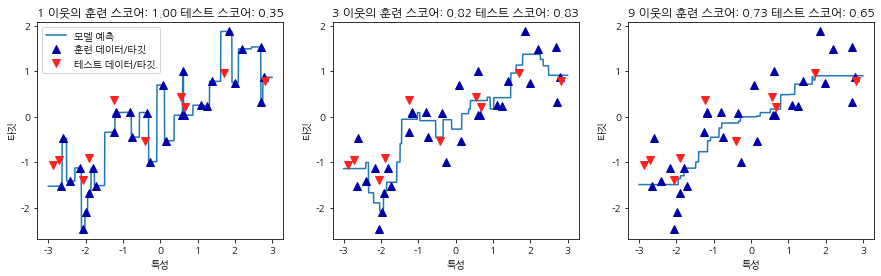

In [3]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

#-3과 3사이에 1000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    #1,3,9 이웃을 사용한 예축을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v',c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
        
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")

w[0]: 0.393906  b: -0.031804


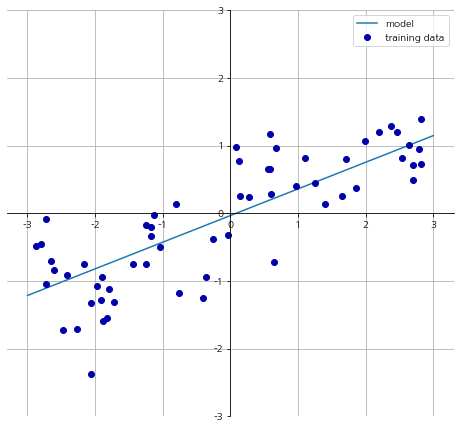

In [4]:
mglearn.plots.plot_linear_regression_wave()

In [5]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_: ",lr.coef_)
print("lr.intercept_: ", lr.intercept_)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746
훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66
